In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = np.load('/content/drive/Shareddrives/2022-1 KUBIG 음악추천시스템/melspectogram.npy')

In [ ]:
a.shape

(1000, 128, 2584)

In [ ]:
import cv2

In [ ]:
cv2.resize(a[0], (512, 512), interpolation = cv2.INTER_LANCZOS4).shape

(512, 512)

In [ ]:
new = []
for i in range(1000):
  new.append(cv2.resize(a[i], (512, 512), interpolation = cv2.INTER_LANCZOS4))

In [ ]:
np.array(new).shape

(1000, 512, 512)

In [ ]:
new2 = []
for i in range(1000):
  new2.append(np.array([new[i], new[i], new[i]]))

In [ ]:
np.array(new2).shape

(1000, 3, 512, 512)

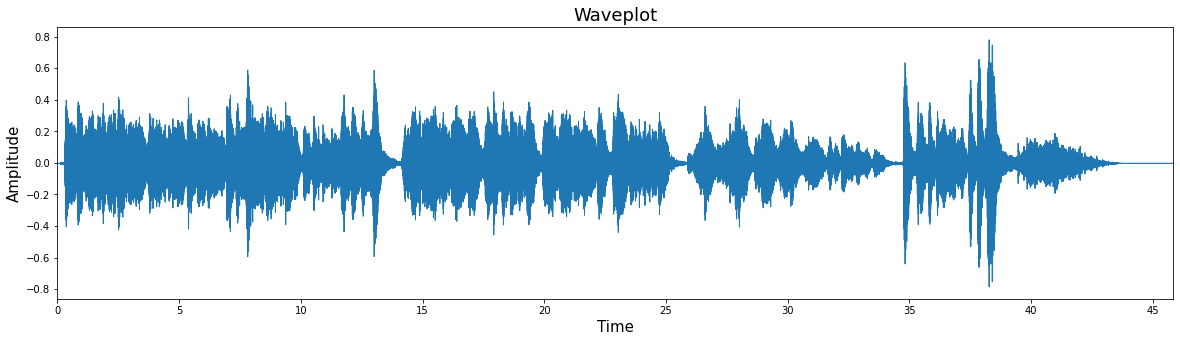

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(signal, sr=sr)
plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()

In [ ]:
import IPython.display as ipd
ipd.Audio(signal, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

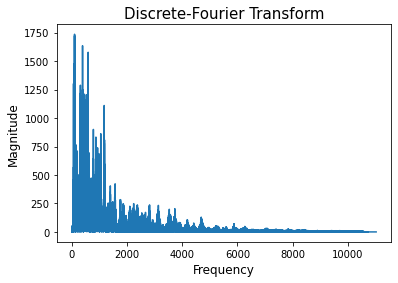

In [ ]:
# Creating a Discrete-Fourier Transform with our FFT algorithm
fast_fourier_transf = np.fft.fft(signal)
# Magnitudes indicate the contribution of each frequency
magnitude = np.abs(fast_fourier_transf)
# mapping the magnitude to the relative frequency bins
frequency = np.linspace(0, sr, len(magnitude))
# We only need the first half of the magnitude and frequency
left_mag = magnitude[:int(len(magnitude)/2)]
left_freq = frequency[:int(len(frequency)/2)]
plt.plot(left_freq, left_mag)
plt.title('Discrete-Fourier Transform', fontdict=dict(size=15))
plt.xlabel('Frequency', fontdict=dict(size=12))
plt.ylabel('Magnitude', fontdict=dict(size=12))
plt.show()

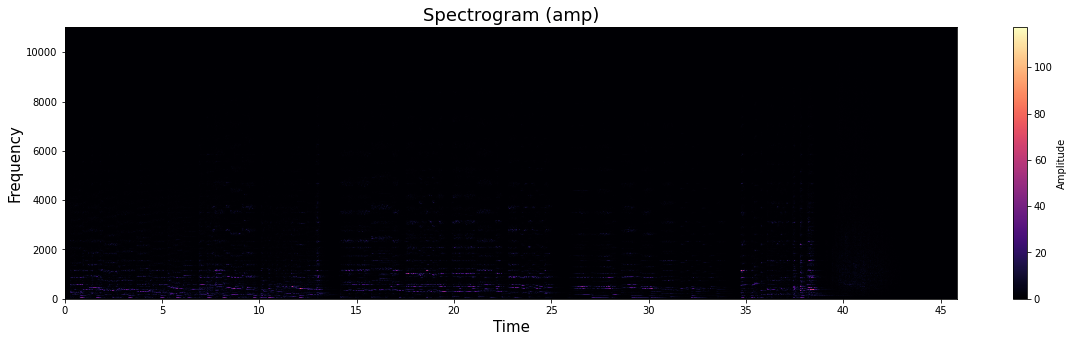

In [ ]:
# this is the number of samples in a window per fft
n_fft = 2048
# The amount of samples we are shifting after each fft
hop_length = 512
# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)
# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))
# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis= 'hz', hop_length=hop_length)
plt.colorbar(label='Amplitude')
plt.title('Spectrogram (amp)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

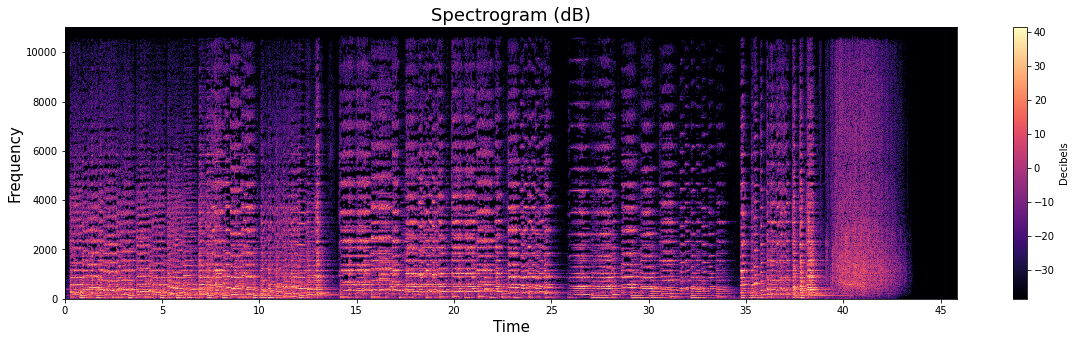

In [ ]:
# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
# gathering the absolute values for all values in our audio_stft 
spectrogram = np.abs(audio_stft)
# Converting the amplitude to decibels
log_spectro = librosa.amplitude_to_db(spectrogram)
# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))
# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(log_spectro, sr=sr, x_axis= 'time' , y_axis='hz', hop_length=hop_length, cmap='magma')
plt.colorbar(label= 'Decibels')
plt.title('Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()







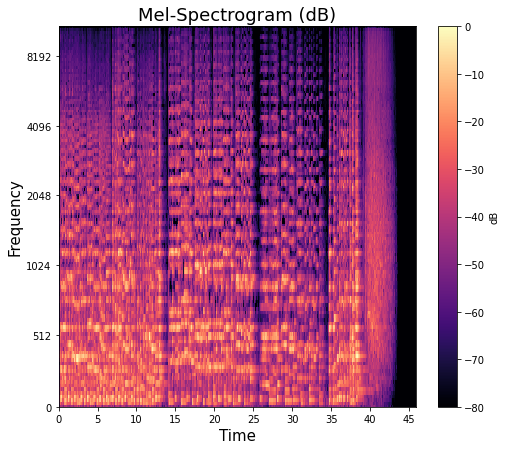

In [ ]:
mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, 
 n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(8, 7))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma', 
 hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()


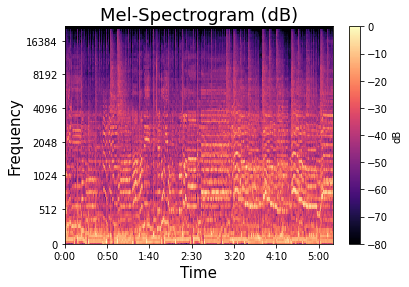

In [ ]:
plt.figure(figsize=(6, 4))
librosa.display.specshow(a[803], sr=44100, x_axis='time', y_axis='mel', cmap='magma', 
 hop_length=5400)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()
